#### Boisset et al Bone Marrow Experiment

Micro-dissected: JC20, JC21,JC26, JC27, JC28, JC30, JC32, JC32, JC35, JC36, JC37,JC39, JC40,JC41,JC43,JC44,JC45,JC46,JC47

Sorted single cell: JC4, JC48P2,JC48P4, JC48P6, JC48P7

In [2]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sb
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
from matplotlib.transforms import Bbox
sys.path.append('../code/')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from ldaSingleCell import VariationalLDA
from utilsFuncs import *


In [3]:
jc20 = pd.read_csv("/data/Alex/Boisset/GSE76983_expdata_BMJhscC.csv",sep="\t",header=0, index_col=0)

In [4]:
jc20.shape

(23536, 1915)

In [6]:
jc20[jc20.astype(bool).sum(axis=1)>10]

,JC4_349_HSC_FE_S13_,JC4_350_HSC_FE_S13_,JC4_351_HSC_FE_S13_,JC4_352_HSC_FE_S13_,JC4_353_HSC_FE_S13_,JC4_354_HSC_FE_S13_,JC4_355_HSC_FE_S13_,JC4_356_HSC_FE_S13_,JC4_357_HSC_FE_S13_,JC4_358_HSC_FE_S13_,...,JC48P6_1195_HSC_FE_S8_,JC48P6_1196_HSC_FE_S8_,JC48P6_1197_HSC_FE_S8_,JC48P6_1198_HSC_FE_S8_,JC48P6_1199_HSC_FE_S8_,JC48P6_1200_HSC_FE_S8_,JC48P6_1201_HSC_FE_S8_,JC48P6_1202_HSC_FE_S8_,JC48P6_1203_HSC_FE_S8_,JC48P6_1204_HSC_FE_S8_
GENEID,,,,,,,,,,,,,,,,,,,,,
0610007P14Rik__chr12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,1.001958,0.000000,0.0,1.001958,1.001958
0610009B22Rik__chr11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
0610009D07Rik__chr12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,1.001958,1.001958,0.0,0.000000,0.000000
0610009L18Rik__chr11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,1.001958,0.000000,0.000000,0.0,0.000000,0.000000
0610009O20Rik__chr18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zxdc__chr6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,1.001958,0.0,0.000000,0.000000
Zyg11b__chr4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,1.001958,0.000000,0.000000,0.0,0.000000,0.000000
Zyx__chr6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.007853,0.0,0.0,2.007853,2.007853,1.001958,0.0,0.000000,2.007853


In [7]:
jc20 = jc20[jc20.astype(bool).sum(axis=1)>10]

In [8]:
sortedCells = jc20.filter(regex='JC4_|JC48P')

In [9]:
dissected = jc20.filter(regex="JC2._|JC3._|JC40_|JC41_|JC43_|JC44_|JC45_|JC46_|JC47_",axis=1)

In [10]:
sortedCells = sortedCells.T

In [11]:
sortedCells = sortedCells[sortedCells.sum(axis=1)>0]

In [12]:
sortedCells = sortedCells.T

In [13]:
sortedCells

,JC4_349_HSC_FE_S13_,JC4_350_HSC_FE_S13_,JC4_351_HSC_FE_S13_,JC4_352_HSC_FE_S13_,JC4_353_HSC_FE_S13_,JC4_354_HSC_FE_S13_,JC4_355_HSC_FE_S13_,JC4_356_HSC_FE_S13_,JC4_357_HSC_FE_S13_,JC4_358_HSC_FE_S13_,...,JC48P6_1195_HSC_FE_S8_,JC48P6_1196_HSC_FE_S8_,JC48P6_1197_HSC_FE_S8_,JC48P6_1198_HSC_FE_S8_,JC48P6_1199_HSC_FE_S8_,JC48P6_1200_HSC_FE_S8_,JC48P6_1201_HSC_FE_S8_,JC48P6_1202_HSC_FE_S8_,JC48P6_1203_HSC_FE_S8_,JC48P6_1204_HSC_FE_S8_
GENEID,,,,,,,,,,,,,,,,,,,,,
0610007P14Rik__chr12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,1.001958,0.000000,0.0,1.001958,1.001958
0610009B22Rik__chr11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
0610009D07Rik__chr12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,1.001958,1.001958,0.0,0.000000,0.000000
0610009L18Rik__chr11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,1.001958,0.000000,0.000000,0.0,0.000000,0.000000
0610009O20Rik__chr18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zxdc__chr6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,1.001958,0.0,0.000000,0.000000
Zyg11b__chr4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,1.001958,0.000000,0.000000,0.0,0.000000,0.000000
Zyx__chr6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.007853,0.0,0.0,2.007853,2.007853,1.001958,0.0,0.000000,2.007853


In [14]:
dissected.shape

(10796, 1546)

In [15]:
singleCellLDA = VariationalLDA(K = 10,alpha = 1,eta=0.05,update_alpha=True)
singleCellLDA.load_data_sc(sortedCells)
singleCellLDA.run_vb(n_its = 500,initialise=True)

Edited
Initialising
Starting iterations
Iteration 0 (change = 13.61079508678637) (15.600000000000001 seconds, I think I'll finish in 130.00000000000003 minutes). Alpha: (5.888842036167111,7.024661351303648)
Iteration 1 (change = 0.14722237150389797) (15.589999999999996 seconds, I think I'll finish in 129.6568333333333 minutes). Alpha: (19.79454248796122,23.6068138204267)
Iteration 2 (change = 0.14793057401353368) (15.490000000000009 seconds, I think I'll finish in 128.56700000000006 minutes). Alpha: (42.01541519400158,49.69754355346921)
Iteration 3 (change = 0.14363465514428167) (15.519999999999996 seconds, I think I'll finish in 128.5573333333333 minutes). Alpha: (65.5202409685403,77.1347946584325)
Iteration 4 (change = 0.13706251955538715) (15.539999999999992 seconds, I think I'll finish in 128.46399999999994 minutes). Alpha: (88.02756746409017,103.37972396951976)
Iteration 5 (change = 0.13074597075551744) (15.25 seconds, I think I'll finish in 125.8125 minutes). Alpha: (109.32786041

Iteration 49 (change = 0.1136361342936955) (15.400000000000091 seconds, I think I'll finish in 115.75666666666736 minutes). Alpha: (49.27790073605354,59.71903784542508)
Iteration 50 (change = 0.12003620721415163) (15.259999999999991 seconds, I think I'll finish in 114.44999999999995 minutes). Alpha: (43.872554740290575,53.228683913022415)
Iteration 51 (change = 0.12690972367546646) (15.279999999999973 seconds, I think I'll finish in 114.34533333333313 minutes). Alpha: (39.06324952961224,47.44531532935424)
Iteration 52 (change = 0.13417889691957413) (15.17999999999995 seconds, I think I'll finish in 113.34399999999962 minutes). Alpha: (34.79996623071825,42.31045290799358)
Iteration 53 (change = 0.14179643473737202) (15.220000000000027 seconds, I think I'll finish in 113.3890000000002 minutes). Alpha: (31.02902351568416,37.76102981220491)
Iteration 54 (change = 0.1497016099189072) (15.220000000000027 seconds, I think I'll finish in 113.13533333333353 minutes). Alpha: (27.696666530387695,

Iteration 98 (change = 0.1637180126450582) (15.200000000000045 seconds, I think I'll finish in 101.8400000000003 minutes). Alpha: (0.855198011938561,2.0509106696407606)
Iteration 99 (change = 0.16211548480256055) (15.620000000000118 seconds, I think I'll finish in 104.39366666666746 minutes). Alpha: (0.8236798838391268,2.0015603664590733)
Iteration 100 (change = 0.16071907456518852) (15.490000000000009 seconds, I think I'll finish in 103.26666666666672 minutes). Alpha: (0.793965135684872,1.9543118700426216)
Iteration 101 (change = 0.15943599609091505) (15.459999999999809 seconds, I think I'll finish in 102.80899999999873 minutes). Alpha: (0.7658857088049144,1.908959004191021)
Iteration 102 (change = 0.15821796529410484) (15.490000000000009 seconds, I think I'll finish in 102.7503333333334 minutes). Alpha: (0.7392918272873737,1.8653288757825919)
Iteration 103 (change = 0.15700761665183538) (14.940000000000055 seconds, I think I'll finish in 98.85300000000036 minutes). Alpha: (0.71404971

Iteration 147 (change = 0.11307564614340405) (16.779999999999745 seconds, I think I'll finish in 98.72233333333183 minutes). Alpha: (0.13628532332604448,0.7172977549227372)
Iteration 148 (change = 0.11222880284143476) (17.610000000000127 seconds, I think I'll finish in 103.31200000000075 minutes). Alpha: (0.13227942963832687,0.701358445287543)
Iteration 149 (change = 0.1112639183428343) (17.699999999999818 seconds, I think I'll finish in 103.54499999999894 minutes). Alpha: (0.12880733778571352,0.6859009587091085)
Iteration 150 (change = 0.11015591204148537) (17.170000000000073 seconds, I think I'll finish in 100.15833333333376 minutes). Alpha: (0.12555445568959478,0.670926163180014)
Iteration 151 (change = 0.10890185909210064) (17.019999999999982 seconds, I think I'll finish in 98.99966666666657 minutes). Alpha: (0.12250599881746353,0.6564424872080552)
Iteration 152 (change = 0.10750691042208649) (17.960000000000036 seconds, I think I'll finish in 104.1680000000002 minutes). Alpha: (0.

Iteration 195 (change = 0.031916099585677954) (17.139999999999873 seconds, I think I'll finish in 87.12833333333268 minutes). Alpha: (0.054953297460186956,0.24646708716415705)
Iteration 196 (change = 0.031213717607338664) (16.809999999999945 seconds, I think I'll finish in 85.17066666666639 minutes). Alpha: (0.0543362100019859,0.2403474229431875)
Iteration 197 (change = 0.030536977739090053) (17.0300000000002 seconds, I think I'll finish in 86.001500000001 minutes). Alpha: (0.053785521044750796,0.23433194074718014)
Iteration 198 (change = 0.029883743690219247) (17.309999999999945 seconds, I think I'll finish in 87.12699999999973 minutes). Alpha: (0.053283755215868915,0.2285329465326901)
Iteration 199 (change = 0.029249018628701) (17.4699999999998 seconds, I think I'll finish in 87.64116666666565 minutes). Alpha: (0.05282010741056301,0.2230686853632675)
Iteration 200 (change = 0.028627931772024877) (17.16000000000031 seconds, I think I'll finish in 85.80000000000155 minutes). Alpha: (0.

Iteration 243 (change = 0.013615785894600486) (16.960000000000036 seconds, I think I'll finish in 72.64533333333348 minutes). Alpha: (0.03372500154987877,0.09776071055013678)
Iteration 244 (change = 0.013431258300349583) (17.40000000000009 seconds, I think I'll finish in 74.24000000000039 minutes). Alpha: (0.03328870355943058,0.09604360884892285)
Iteration 245 (change = 0.013251165070502254) (16.590000000000146 seconds, I think I'll finish in 70.50750000000062 minutes). Alpha: (0.03287055231315706,0.09435452918598815)
Iteration 246 (change = 0.013077821050733567) (17.099999999999454 seconds, I think I'll finish in 72.38999999999768 minutes). Alpha: (0.032468439408395194,0.09242775333661572)
Iteration 247 (change = 0.01290714631791677) (17.19000000000051 seconds, I think I'll finish in 72.48450000000214 minutes). Alpha: (0.03207973393420564,0.09042046631989677)
Iteration 248 (change = 0.012739163295504181) (16.970000000000255 seconds, I think I'll finish in 71.27400000000107 minutes). A

Iteration 290 (change = 0.007943018621464041) (17.530000000000655 seconds, I think I'll finish in 61.35500000000229 minutes). Alpha: (0.02237009752810335,0.054099530211598496)
Iteration 291 (change = 0.007879741074236557) (18.269999999999527 seconds, I think I'll finish in 63.640499999998354 minutes). Alpha: (0.02223834533348478,0.05364298558644973)
Iteration 292 (change = 0.007815762165954445) (17.640000000000327 seconds, I think I'll finish in 61.15200000000114 minutes). Alpha: (0.02211190988056095,0.05316403542978356)
Iteration 293 (change = 0.007748517043557552) (17.420000000000073 seconds, I think I'll finish in 60.09900000000025 minutes). Alpha: (0.021951752744295738,0.05268738302831558)
Iteration 294 (change = 0.00768453846896573) (17.719999999999345 seconds, I think I'll finish in 60.838666666664416 minutes). Alpha: (0.02179482161362633,0.05228601280210144)
Iteration 295 (change = 0.0076242173688980345) (18.11999999999989 seconds, I think I'll finish in 61.90999999999963 minute

Iteration 337 (change = 0.005995728724399431) (18.050000000000182 seconds, I think I'll finish in 49.03583333333383 minutes). Alpha: (0.015972725066000042,0.03871896343142583)
Iteration 338 (change = 0.00596573305933596) (17.730000000000473 seconds, I think I'll finish in 47.871000000001274 minutes). Alpha: (0.015909320843542945,0.038565334694721724)
Iteration 339 (change = 0.005933731892476631) (17.269999999999527 seconds, I think I'll finish in 46.341166666665394 minutes). Alpha: (0.015849942778673166,0.03842594591097126)
Iteration 340 (change = 0.0059018558364212475) (17.710000000000036 seconds, I think I'll finish in 47.226666666666766 minutes). Alpha: (0.015794227700376348,0.03829381459840312)
Iteration 341 (change = 0.005869644076908223) (17.909999999999854 seconds, I think I'll finish in 47.46149999999962 minutes). Alpha: (0.015741141371826743,0.038138610013686035)
Iteration 342 (change = 0.0058360459085456005) (17.909999999999854 seconds, I think I'll finish in 47.1629999999996

Iteration 384 (change = 0.0042004702392420944) (17.889999999999418 seconds, I think I'll finish in 34.58733333333221 minutes). Alpha: (0.012521337518057396,0.03335134814570001)
Iteration 385 (change = 0.004157796402054972) (18.340000000000146 seconds, I think I'll finish in 35.15166666666695 minutes). Alpha: (0.012423047559550808,0.03325844814133288)
Iteration 386 (change = 0.0041135747179174035) (17.909999999999854 seconds, I think I'll finish in 34.028999999999726 minutes). Alpha: (0.012335035658973958,0.03312864938219571)
Iteration 387 (change = 0.0040728278359260335) (17.720000000000255 seconds, I think I'll finish in 33.37266666666714 minutes). Alpha: (0.012255437730742391,0.03290094890419682)
Iteration 388 (change = 0.004033534347652531) (17.94000000000051 seconds, I think I'll finish in 33.48800000000095 minutes). Alpha: (0.012182774198764634,0.03269828244837369)
Iteration 389 (change = 0.003994454740926933) (17.75 seconds, I think I'll finish in 32.8375 minutes). Alpha: (0.0121

Iteration 431 (change = 0.003467717870012078) (18.039999999999964 seconds, I think I'll finish in 20.74599999999996 minutes). Alpha: (0.010194075271793557,0.027522279032365392)
Iteration 432 (change = 0.0034701819612112917) (18.729999999999563 seconds, I think I'll finish in 21.22733333333284 minutes). Alpha: (0.010133971870397562,0.027468073408733817)
Iteration 433 (change = 0.003470861589162741) (17.86999999999989 seconds, I think I'll finish in 19.954833333333212 minutes). Alpha: (0.010067317675126584,0.02740445438340941)
Iteration 434 (change = 0.0034701807398887946) (18.25 seconds, I think I'll finish in 20.075 minutes). Alpha: (0.009982510559990186,0.027285961694753964)
Iteration 435 (change = 0.0034686583663864064) (18.82000000000062 seconds, I think I'll finish in 20.388333333334003 minutes). Alpha: (0.009906155535651094,0.02718771444858112)
Iteration 436 (change = 0.0034651794296781365) (17.899999999999636 seconds, I think I'll finish in 19.093333333332946 minutes). Alpha: (0.

Iteration 478 (change = 0.003127001062748642) (15.819999999999709 seconds, I think I'll finish in 5.80066666666656 minutes). Alpha: (0.008143663330691608,0.023797254412519817)
Iteration 479 (change = 0.0031211422596142636) (15.710000000000946 seconds, I think I'll finish in 5.498500000000331 minutes). Alpha: (0.008106550102098308,0.02373294105812396)
Iteration 480 (change = 0.003114616728050484) (15.719999999999345 seconds, I think I'll finish in 5.239999999999782 minutes). Alpha: (0.00807157438272446,0.02367214494303952)
Iteration 481 (change = 0.0031071367191585256) (15.720000000001164 seconds, I think I'll finish in 4.978000000000368 minutes). Alpha: (0.008037468689642328,0.02361357727594068)
Iteration 482 (change = 0.0030996845164202617) (15.889999999999418 seconds, I think I'll finish in 4.766999999999825 minutes). Alpha: (0.00798538777335051,0.023556477956546102)
Iteration 483 (change = 0.003092768693655368) (15.680000000000291 seconds, I think I'll finish in 4.442666666666749 mi

In [22]:
betas_learned = pd.DataFrame(singleCellLDA.beta_matrix)
topic_dict = betas_learned.to_dict(orient='index')

In [19]:
scLDA = VariationalLDA(corpus=singleCellLDA.corpus,K=20,
                       word_index=singleCellLDA.word_index,
                       alpha=1,eta=0.05,update_alpha=True, fixed_topics=topic_dict)

Object created with 365 documents


In [20]:
scLDA.load_data_sc(dissected)

Edited


In [ ]:
scLDA.run_vb(n_its=400,initialise=True)

Initialising
Here
Starting iterations


/home1/2064240p/SimonLDA/lda/code/ldaSingleCell.py:442: RuntimeWarning: divide by zero encountered in log
  log_phi_matrix = np.log(self.beta_matrix[:,w]) + psi(self.gamma_matrix[d,:]).T


Iteration 0 (change = 25.513468647636877) (58.76999999999862 seconds, I think I'll finish in 391.7999999999908 minutes). Alpha: (0.9171145698285942,6.064874745168422)
Iteration 1 (change = 8.879601792764923) (56.36000000000058 seconds, I think I'll finish in 374.79400000000385 minutes). Alpha: (0.7950953127126887,6.678193189255774)
Iteration 2 (change = 5.140937598710692) (56.19000000000051 seconds, I think I'll finish in 372.7270000000034 minutes). Alpha: (0.6990383857781687,6.078236412102775)
Iteration 3 (change = 3.737606954972386) (56.54999999999927 seconds, I think I'll finish in 374.1724999999952 minutes). Alpha: (0.6475057666772597,5.478114802275282)
Iteration 4 (change = 3.464087595629593) (56.42000000000007 seconds, I think I'll finish in 372.37200000000047 minutes). Alpha: (0.6137586063371918,4.786316252352453)
Iteration 5 (change = 3.1662802908390653) (55.80999999999949 seconds, I think I'll finish in 367.41583333333 minutes). Alpha: (0.5897135651350619,4.159921755729929)
It

Iteration 49 (change = 0.37873610083784204) (62.3700000000008 seconds, I think I'll finish in 364.8645000000046 minutes). Alpha: (0.042903064362846716,0.5528533874496235)
Iteration 50 (change = 0.3697943706982444) (61.56999999999971 seconds, I think I'll finish in 359.15833333333165 minutes). Alpha: (0.04163678124785479,0.5432909679791429)
Iteration 51 (change = 0.36092447503680614) (62.039999999999054 seconds, I think I'll finish in 360.86599999999453 minutes). Alpha: (0.04050845204157315,0.5341489985053757)
Iteration 52 (change = 0.35236205621337474) (61.5 seconds, I think I'll finish in 356.7 minutes). Alpha: (0.03945379759165371,0.5254136059007997)
Iteration 53 (change = 0.3447251350389445) (62.80000000000109 seconds, I think I'll finish in 363.19333333333964 minutes). Alpha: (0.03848597695391748,0.5170882187288339)
Iteration 54 (change = 0.33793939463075007) (62.469999999999345 seconds, I think I'll finish in 360.2436666666629 minutes). Alpha: (0.037630392968298294,0.5091397732161

Iteration 98 (change = 0.11349275525307735) (62.900000000001455 seconds, I think I'll finish in 316.59666666667397 minutes). Alpha: (0.017024420491476035,0.34286920848954366)


In [23]:
wordTopic = pd.DataFrame(singleCellLDA.beta_matrix, columns=sortedCells.index)

In [ ]:
sb.set(font_scale=8)
green_sorted = mpatches.Patch(color="green", label="sorted")
purple_dissected = mpatches.Patch(color="purple", label='interacting')
legend_TN = [green_sorted, purple_dissected]
heatmap1 = sb.clustermap(np.log1p(all_cells.loc[ranked_genes.sort_values([2,1])[0:50][0].values]),
                  figsize=(60,40),row_cluster=False, col_cluster=False,
                         robust=True,cmap='coolwarm',col_colors = colours)

heatmap1.ax_heatmap.set_xticks([])
heatmap1.ax_heatmap.set_xlabel("Cells",fontsize=120)
heatmap1.ax_heatmap.set_ylabel("Genes",fontsize=120)
heatmap1.cax.set_position(pos=Bbox(np.array([[0.11,0.4],[0.127,0.8]])))

l2 = heatmap1.ax_heatmap.legend(loc='center left',bbox_to_anchor=(1.06,0.70),handles=legend_TN,frameon=False,
                                fontsize="large")

#plt.savefig("Boisset_colorbar.png",bbox_inches='tight')



In [24]:
import re
p = re.compile("Rps|Rpl|Rp")
jc20filtered = jc20.index.drop(list(filter(p.match,jc20.index)))

In [25]:
int_genes = ranking_genes_realData(10,30,scLDA,jc20filtered)

In [26]:
def subGenes(genes):
    return genes.split("_")[0]

int_genes[0] = int_genes[0].apply(subGenes)

In [27]:
int_genes = int_genes.groupby(0).filter(lambda x: len(x)<10)

In [110]:
final_genes = []
for i in range(10,30):
    g = int_genes[int_genes[3]==i].sort_values([1],ascending=False)[0:20][0].values
    final_genes.append(list(g))
    

In [111]:
final_genes = [item for sublist in final_genes for item in sublist]

In [116]:
len(list(set(final_genes)))

305

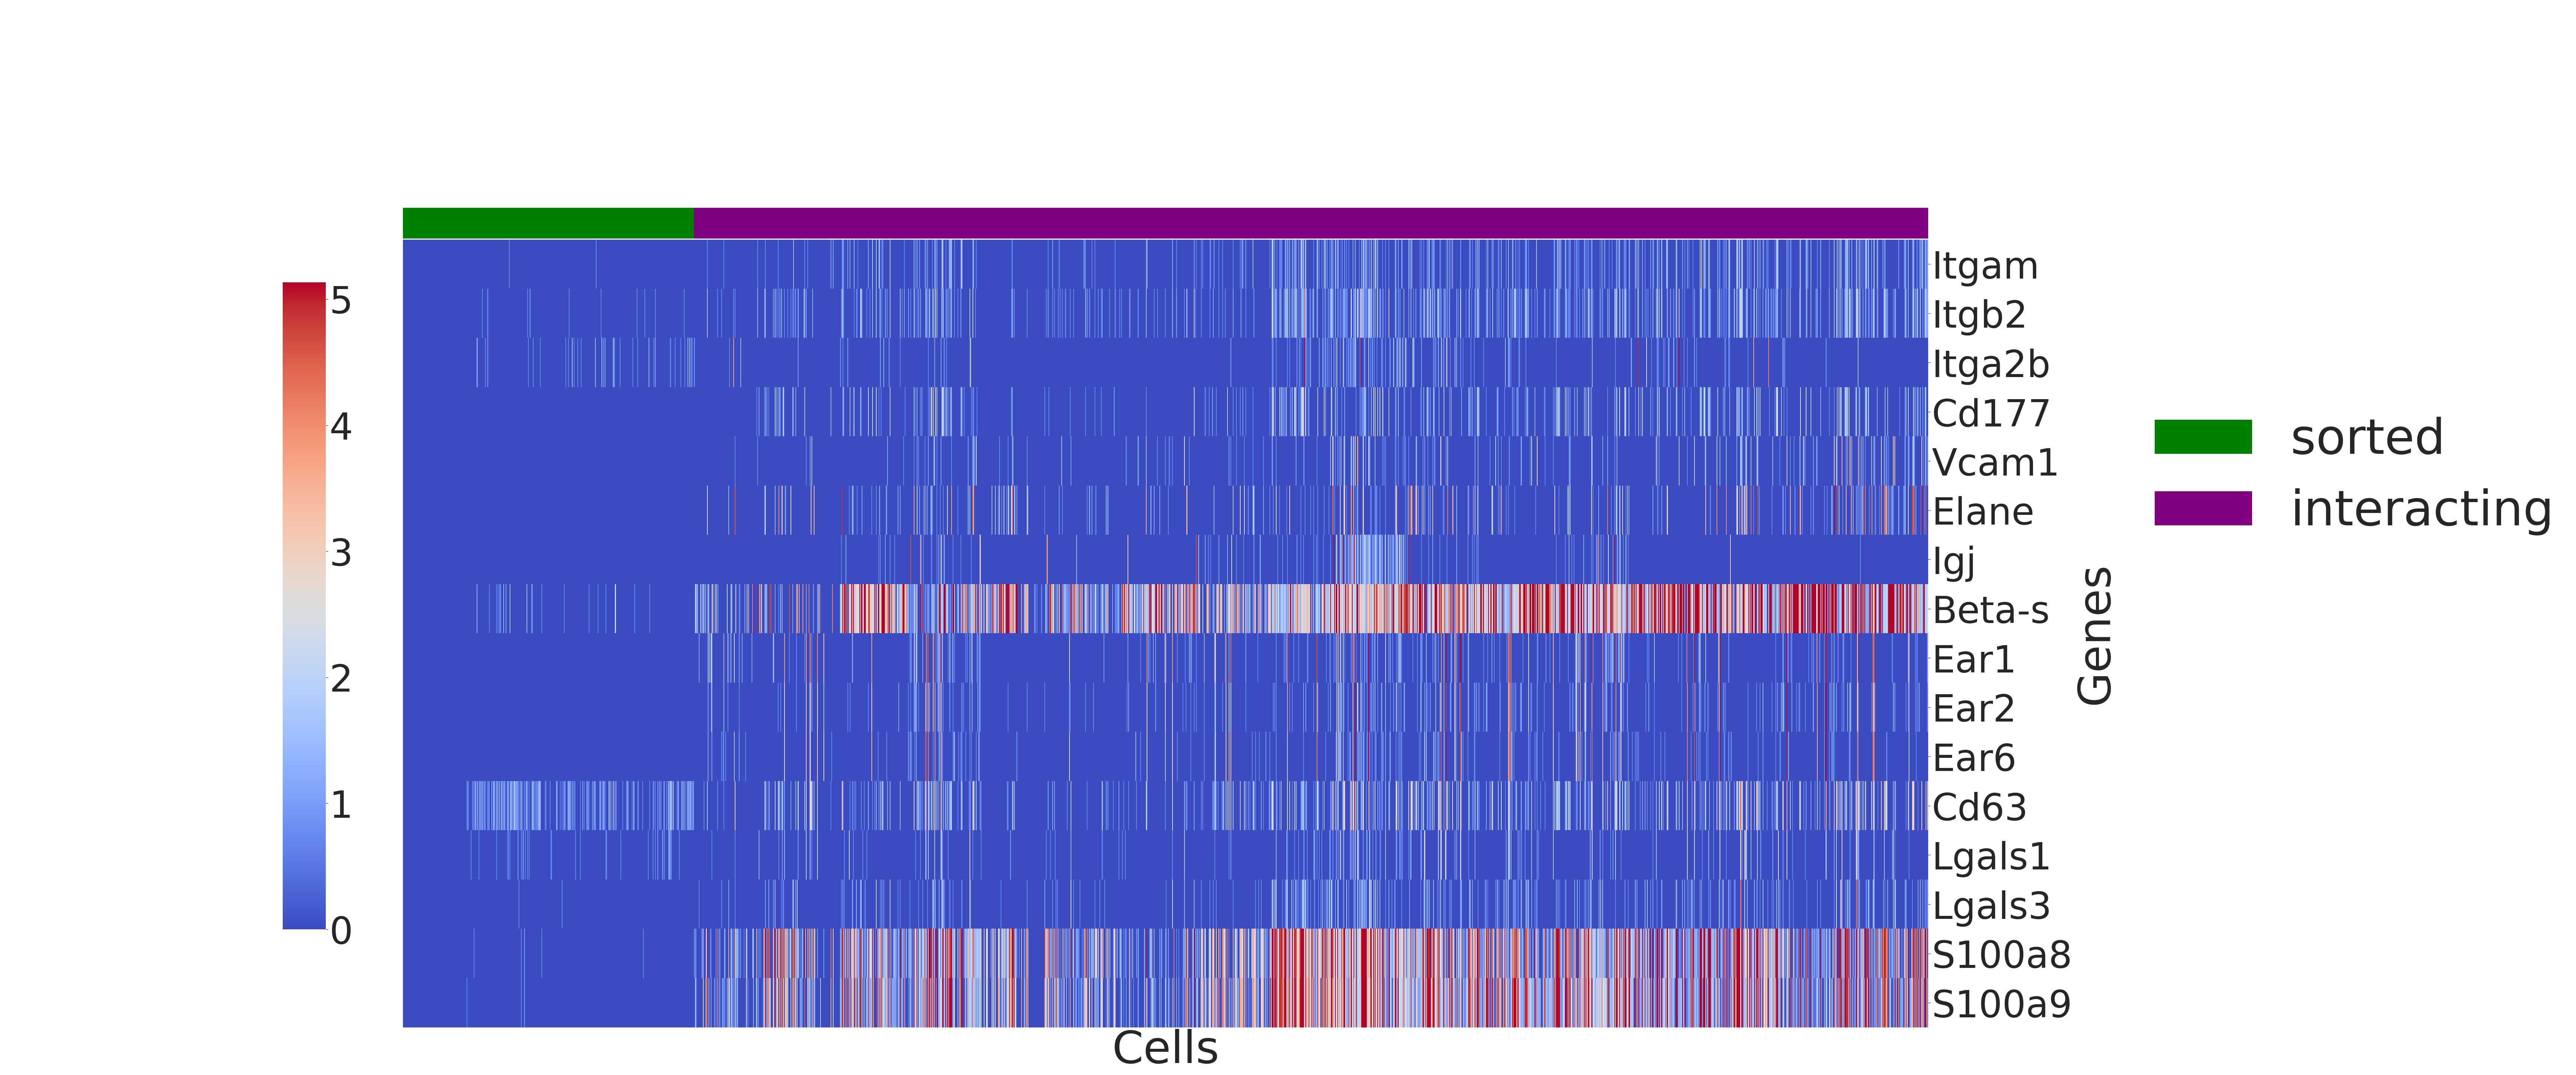

In [814]:
sb.set(font_scale=9)
green_sorted = mpatches.Patch(color="green", label="sorted")
purple_dissected = mpatches.Patch(color="purple", label='interacting')
legend_TN = [green_sorted, purple_dissected]
heatmap1 = sb.clustermap(np.log1p(all_cells.loc[["Itgam","Itgb2","Itga2b","Cd177","Vcam1","Elane","Igj","Beta-s",
                                                 "Ear1","Ear2","Ear6","Cd63","Lgals1","Lgals3",
                                                "S100a8","S100a9"]]),
                  figsize=(80,60),row_cluster=False, col_cluster=False,
                         robust=True,cmap='coolwarm',col_colors = colours)

heatmap1.ax_heatmap.set_xticks([])
heatmap1.ax_heatmap.set_xlabel("Cells",fontsize=120)
heatmap1.ax_heatmap.set_ylabel("Genes",fontsize=120)
heatmap1.cax.set_position(pos=Bbox(np.array([[0.15,0.4],[0.17,0.8]])))

l2 = heatmap1.ax_heatmap.legend(loc='center left',bbox_to_anchor=(1.12,0.70),handles=legend_TN,frameon=False,
                                fontsize="large")

#plt.savefig("Boisset_new.png",bbox_inches='tight')
#plt.savefig("Fig8.eps",bbox_inches='tight',dpi=300)